In [1]:
import matplotlib.pyplot as plt
%matplotlib inline  
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import random
def print_np(x):
    print ("Type is %s" % (type(x)))
    print ("Shape is %s" % (x.shape,))
#     print ("Values are: \n%s" % (x))

In [2]:
import sys
sys.path.append('../')
import model
import cost
from scipy.integrate import solve_ivp

In [50]:
x_t = np.zeros(3)
x_t[0] = 0.0
x_t[1] = 2.0
x_t[2] = 0.0
ix = 3
iu = 2
N = 500
delT = 0.1
myModel = model.unicycle('Hello',ix,iu,delT)
myCost = cost.unicycle('Hello',x_t,N)
max_iter = 100

In [71]:
x0 = np.zeros(3)
x0[0] = -1.0 # -2.0
x0[1] = 0.0 # -0.5
x0[2] = np.pi/2

u0 = np.random.rand(N,iu)

In [72]:
from Scvx import Scvx

In [94]:
i1 = Scvx('unicycle',N,max_iter,myModel,myCost)
x, u = i1.update(x0,u0)

137.4844332566276 447.77672010728116 447.7767201072813 optimal
iteration   cost        cost_vc   reduction    expected    radius_tr
0           448         1.5e+09     270         310         5.0         
63.760543856491445 177.9773327847312 177.9773327847313 optimal
1           178         0           69          114         5.0         
34.71712411541209 108.95861176483083 108.95861176483098 optimal
2           109         0           72.6        74.2        5.0         
20.34793363341806 36.311882067632304 36.311882067632325 optimal
3           36.3        0           12.8        16          10.0        
16.34250924142192 23.490471671869216 23.490471671869177 optimal
4           23.5        0           7.06        7.15        10.0        
14.17261063505969 16.43374419742956 16.43374419742956 optimal
5           16.4        0           2.87        2.26        20.0        
11.858121574718737 13.559304086719312 13.55930408671932 optimal
6           13.6        0           1.52        1

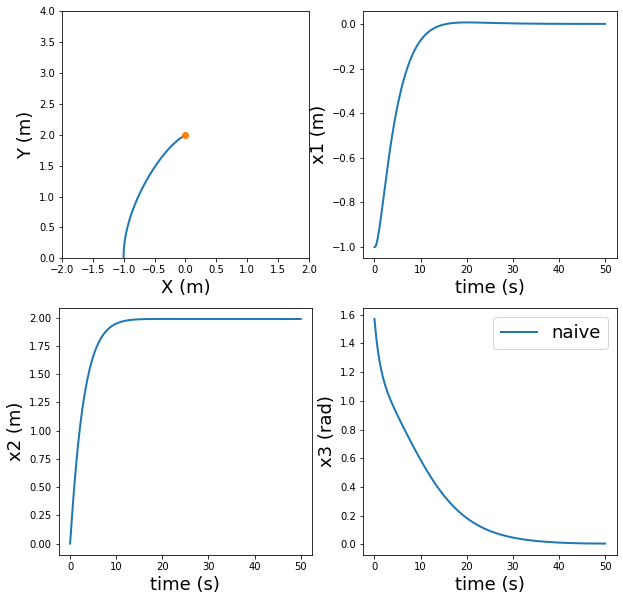

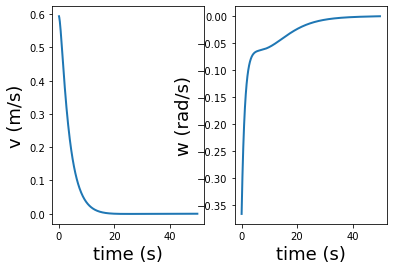

In [81]:
plt.figure(figsize=(10,10))
fS = 18
plt.subplot(221)
plt.plot(x[:,0], x[:,1], linewidth=2.0)
plt.plot(x_t[0],x_t[1],"o",label='goal')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-2, 2, 0, 4.0])
plt.xlabel('X (m)', fontsize = fS)
plt.ylabel('Y (m)', fontsize = fS)
plt.subplot(222)
plt.plot(np.array(range(N+1))*0.1, x[:,0], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x1 (m)', fontsize = fS)
plt.subplot(223)
plt.plot(np.array(range(N+1))*0.1, x[:,1], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x2 (m)', fontsize = fS)
plt.subplot(224)
plt.plot(np.array(range(N+1))*0.1, x[:,2], linewidth=2.0,label='naive')
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('x3 (rad)', fontsize = fS)
plt.legend(fontsize=fS)
plt.show()

plt.figure()
plt.subplot(121)
plt.plot(np.array(range(N))*0.1, u[:,0], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('v (m/s)', fontsize = fS)
plt.subplot(122)
plt.plot(np.array(range(N))*0.1, u[:,1], linewidth=2.0)
plt.xlabel('time (s)', fontsize = fS)
plt.ylabel('w (rad/s)', fontsize = fS)
plt.show()